In [2]:
import numpy as np
from scripts.models import *
from scripts.utils import *
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print('CT training images :',len(os.listdir("data/Dataset/images/train/CT")))
print('MRI training images :',len(os.listdir("data/Dataset/images/train/MRI")))

CT training images : 1742
MRI training images : 1744


In [4]:
x = create_dataset("data/Dataset/images/train/MRI", target_size=(360, 360)).batch(15)
y = next(iter(x))

2024-06-03 21:34:17.647195: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-03 21:34:17.647306: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-03 21:34:17.647323: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-03 21:34:17.647766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-03 21:34:17.648178: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


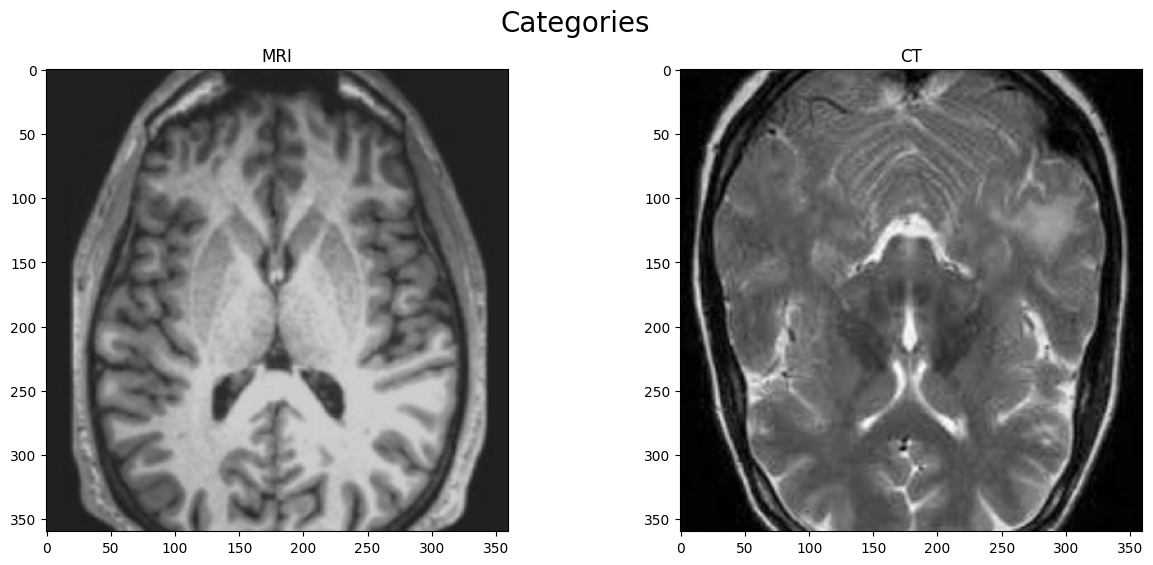

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Categories', fontsize=20)

ax = axes[0]
ax.imshow(y[0])
axes[0].set_title('MRI')

ax = axes[1]
ax.imshow(y[1])
axes[1].set_title('CT')


plt.show()